# Let's discover Fourier transforms and gaussian random fields together

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#import skypy
from scipy.fft import fft, ifft, fftfreq #same as numpy fft functions but has more additional functions
from scipy.ndimage import gaussian_filter
from scipy.signal import square

Let's define a couple parameters

In [6]:
N= 5000 #number of sample points
S=2*np.pi # range of the function. lose any frequency below this/wavelengths above this
#since it's assumed to be periodic
T=S/N #spacing between points. The "Delta x" if you will - this is a limiting frequency. lose any details below this width.
#minimum wavelength that can be included is twice the deltax.
#so max frequency is sampling frequency over 2 - called nyquist frequency.
#also the smallest frequency difference you can get if you have two functions with really similar frequency.
x=np.linspace(0,2*np.pi,N) #let's sample the range between 0 and 2 Pi!

We are going to generate three sinusoidal functions: one with a long wavelength, one with a short wavelength, one with an intermediate wavelength. Then sum them to get a a superposition!

In [9]:
#long wave
klong=1 #frequency
along=5 #amplitude
long_wave=along*np.sin(klong*x)

#short wave
kshort=20
ashort=1
short_wave=ashort*np.sin(kshort*x)

#midsize wave
kmid=5
amid=2
mid_wave=amid*np.sin(kmid*x)

#Now let's make combinations
field=long_wave+short_wave #2-wave combination
field2=long_wave+short_wave+mid_wave #3-wave combination


In each case, k is the frequency (here a spatial frequency). As any frequency, it varies as the inverse of the wavelength is corresponds to. Let's look for the wavelength lambda:
sin(kx)=sin(kx+2*pi)=sin(k(x+lambda)) so Here it is easy to find that k=2*pi/lambda where lambda is wavelength. the 2pi is not always included as part of lambda.

<Figure size 800x600 with 0 Axes>

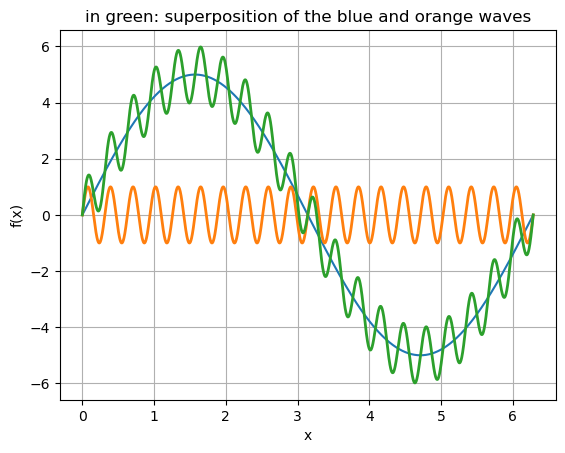

In [12]:
# Let's plot things!
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()

ax.plot(x, long_wave, markeredgewidth=2)
ax.plot(x, short_wave, linewidth=2.0)
ax.plot(x,field,linewidth=2.0)


plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('in green: superposition of the blue and orange waves')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

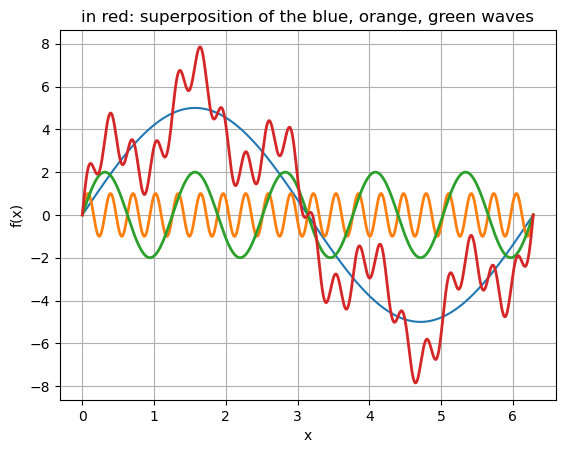

In [14]:
# Let's plot things!
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()

ax.plot(x, long_wave, markeredgewidth=2)
ax.plot(x, short_wave, linewidth=2.0)
ax.plot(x, mid_wave, linewidth=2.0)
ax.plot(x,field2,linewidth=2.0)


plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('in red: superposition of the blue, orange, green waves')
plt.grid(True)
plt.show()

In [16]:
N//2

2500

Npoints= 5000


<Figure size 800x600 with 0 Axes>

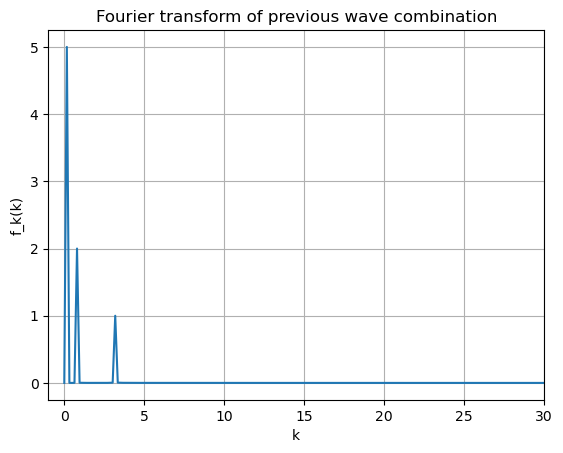

In [29]:
# Let's take the Fourier transform of the 2-wave combination. (Also try the 3 waves combination!)

f_k=fft(field2) #Fourier tansform of our 2-wave composition. 
#We get an array containing the coefficient for each frequency sampled. This coefficient can be complex
# It's ok we'll just look at the modulus, or modulus square of it.

print('Npoints=',np.size(f_k)) #as many sampling points as the initial f(x)

k = fftfreq(N, T)[:N//2] #sampling the positive k frequencies to plot y
# fftfreq allows you to get the frequency sampling points corresponding 
#to the space sampling points (the x). 
#We'll just take the positive ones! (The negative are symmetric)


# Now let's plot the Fourier transform
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
ax.plot(k, 2.0/N * np.abs(f_k[0:N//2]), markeredgewidth=2)
#notice the 2/N due to weird convention for definition of Fourier coefficients

plt.xlabel('k')
plt.ylabel('f_k(k)')
plt.title('Fourier transform of previous wave combination')
plt.grid(True)
plt.xlim(-1,30)
plt.show()

Unsurprisingly, we find that our function was the sum of 2 k-frequencies! We have 2 spikes at the expected k values (divide by 2pi from the original frequency).
We also recover the "amount" (the amplitude) (unchanged) of each k: ashort and along.
Try again with the 3-wave combination or any combination you like.
spread in frequency in k space will be inversely proportional to the spread of the variations in space.

Most functions are not the combination of just a few integer frequencies, but a combination of an infinite,  number of real frequencies. Let's look at a function with sharp edges (but still with a finite period)

Text(0, 0.5, 'f(x)')

<Figure size 800x600 with 0 Axes>

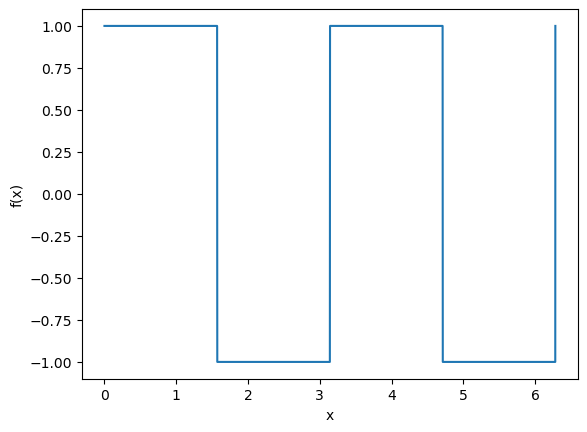

In [31]:
N= 5000 #number of sample points
S=2*np.pi # range of the function
T=S/N #spacing between points. The "Delta x" if you will
x=np.linspace(0,2*np.pi,N) #let's sample the range between 0 and 2 Pi!
f=square(2*x, duty=0.5)

plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
ax.plot(x, f, markeredgewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')

<Figure size 800x600 with 0 Axes>

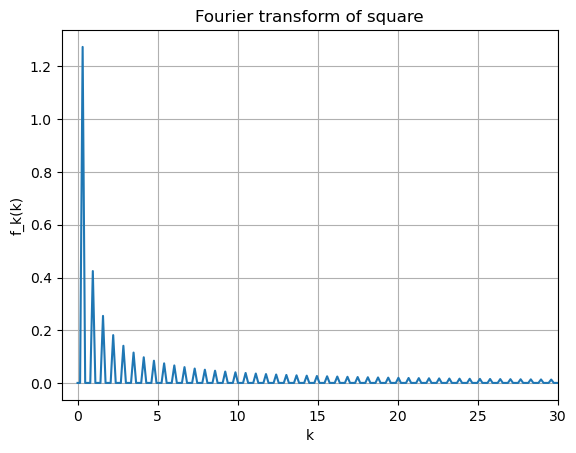

In [33]:
# Let's take the Fourier transform of f
f_k=fft(f) 

#sampling the positive k frequencies to plot f_k
k = fftfreq(N, T)[:N//2] 

# Now let's plot the Fourier transform
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
ax.plot(k, 2.0/N * np.abs(f_k[0:N//2]), markeredgewidth=2)
#notice the 2/N due to weird convention for definition of Fourier coefficients

plt.xlabel('k')
plt.ylabel('f_k(k)')
plt.title('Fourier transform of square')
plt.grid(True)
plt.xlim(-1,30)
plt.show()

Sharp edges are hard to replicate by just summing a few sinusoids! You need to sum up A LOT of of frequencies
(an infinity in fact!) to obtain a sharp edge. Even if high-k contributions seem small, they are crucial to get the tiny details! And sharp edge have infinitely tiny details

<Figure size 1000x1000 with 0 Axes>

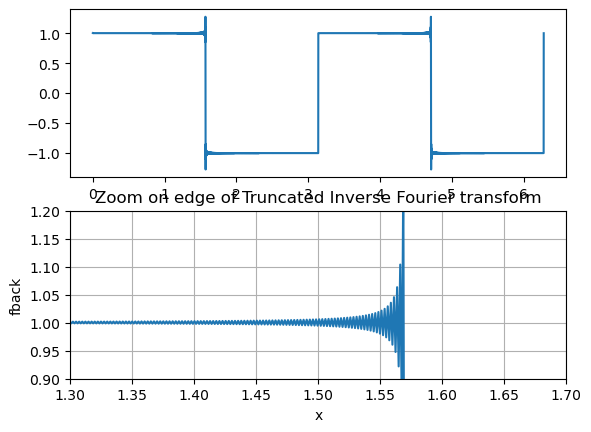

In [39]:
# Let's start from the Fourier transform of f but remove the highest mode kmax (smallest wavelength), 
#kmax is located at position N/2 in the f_k array (N/2+1 is the first negative mode)

f_k1=f_k[0:N//2-1]
f_k2=f_k[N//2+1:N]
f_k_cut=np.concatenate((f_k1,f_k2))

#Let's inverse fourier transform it
f_back=ifft(f_k_cut)

# Now let's plot the Fourier transform
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(2,1)

ax[0].plot(x[0:N-2], f_back, markeredgewidth=2)
plt.xlabel('x')
plt.ylabel('fback')
plt.title('Truncated Inverse Fourier transform of')
plt.grid(True)
plt.xlim(0,6)

# let's also zoom on the corner of the square
ax[1].plot(x[0:N-2], f_back, markeredgewidth=2)
plt.xlabel('x')
plt.ylabel('fback')
plt.title('Zoom on edge of Truncated Inverse Fourier transform')
plt.grid(True)
plt.xlim(1.3,1.7)
plt.ylim(0.9,1.2)

plt.show()

In [ ]:
modified fourier transform: 
# Let's start from the Fourier transform of f but remove the highest mode kmax (smallest wavelength), 
#kmax is located at position N/2 in the f_k array (N/2+1 is the first negative mode)

f_k1=f_k[0:N//2-1]
f_k2=f_k[N//2+1:N]
f_k_cut=np.concatenate((f_k1,[0],f_k2))

#Let's inverse fourier transform it
f_back=ifft(f_k_cut)

# Now let's plot the Fourier transform
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(2,1)

ax[0].plot(x[0:N-2], f_back, markeredgewidth=2)
plt.xlabel('x')
plt.ylabel('fback')
plt.title('Truncated Inverse Fourier transform of')
plt.grid(True)
plt.xlim(0,6)

# let's also zoom on the corner of the square
ax[1].plot(x[0:N-2], f_back, markeredgewidth=2)
plt.xlabel('x')
plt.ylabel('fback')
plt.title('Zoom on edge of Truncated Inverse Fourier transform')
plt.grid(True)
plt.xlim(1.3,1.7)
plt.ylim(0.9,1.2)

plt.show()

Not bad overall, but we miss the sharp edges that acquire sharp oscillations (Gibbs phenomenon). Try to remove more than 1 high-k mode and see what happens!

Most fields (functions) are not periodic and therefore a combination of an infinite, continuous number of real frequencies. Of course, when we model them numerically, the function is limited by the window where we have data (and assumed by fft to be periodic around this window) and sampling.

Let's now study gaussian fields
Let's define a 1-dimensional gaussian random field. This could be a 1D version of the density field in the early Universe.

<Figure size 800x600 with 0 Axes>

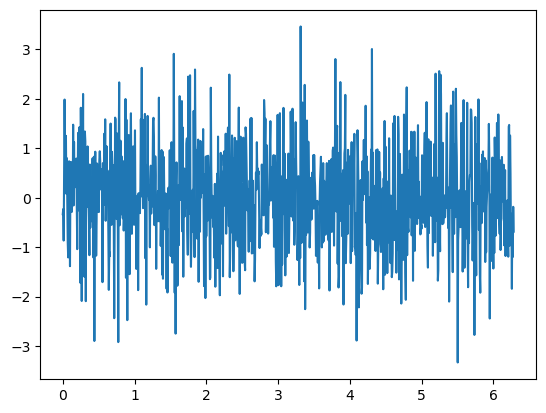

In [41]:
N1=1000 #number of sampling points.

#let's randomly draw the overdensities (average is 0, standard deviation is 1)
random_field=np.random.normal(loc=0, scale=1.0, size=N1) 
#These will now be assigned to a 1D array of positions
x2=np.linspace(0,2*np.pi,N1)

#Let's plot this 1D field
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
ax.plot(x2, random_field, markeredgewidth=2)

Unsurprisingly, this density field is very random! One question we might have is: what are the frequencies it contains? What is its Fourier transform? Let's compute and plot it!

<Figure size 800x600 with 0 Axes>

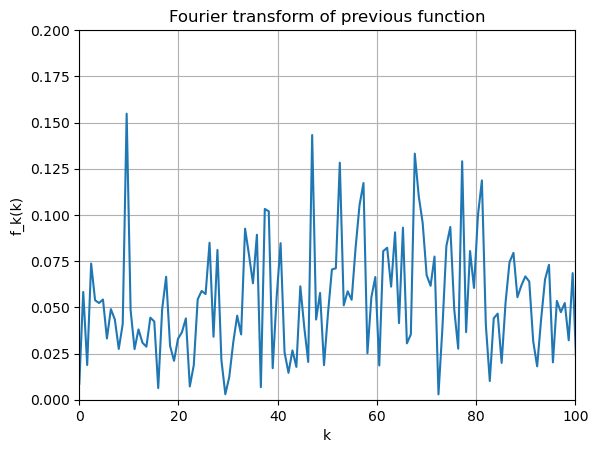

In [43]:
y=fft(random_field) #Fourier tansform of our composition
k = fftfreq(N1, T)[:N1//2] #sampling the frequencies

plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
ax.plot(k, 2.0/N1 * np.abs(y[0:N1//2]), markeredgewidth=2)
plt.xlabel('k')
plt.ylabel('f_k(k)')
plt.title('Fourier transform of previous function')
plt.grid(True)
plt.xlim(0,100)
plt.ylim(0,0.2)
plt.show()

It's has some randomness too! To fully understand what happens, re-run the field creation and Fourier transorm plot cells several times.

What you realize is that, on average, no range of frequencies seems to be particularly favored. Each instance of the random fields is made of an unconstrained, undiscriminated mix of high and low frequencies. Small and high wavelengths are all equally likely to occur on a given run. 
This is called a WHITE noise. 
Because no range of wavelengths is favored, the fourier transform is on average flat. But we can build more interesting gaussian fields that favor some scales.

To create a random gaussian field with a certain mix of scales we have to start in frequency space to curate a certain mix of frequencies.

Text(0, 0.5, 'f_k(k)')

<Figure size 800x600 with 0 Axes>

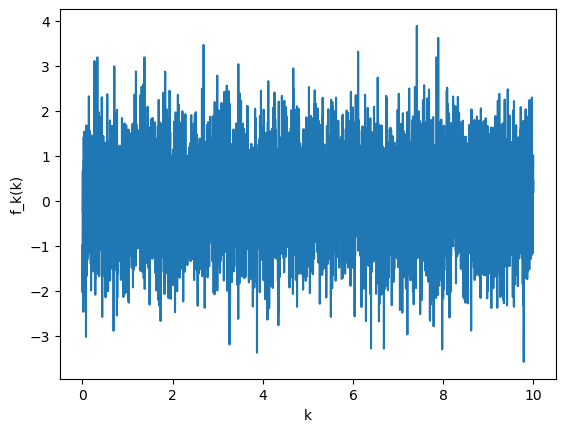

In [74]:
#Let's first generate a white gaussian random mix of fourier coefficients to assign to our frequencies kk
N1=5000
random_spec=np.random.normal(loc=0, scale=1.0, size=N1) #real part ("amplitude") -using gaussian fields in fourier space is easy
random_speci=np.random.normal(loc=0, scale=1.0, size=N1) #imaginary part ("shift" compared to other frequencies)
random=random_spec+1j*random_speci # total fourier coefficients
#Now let's sample frequencies kk
kk=np.linspace(0.0001,10,N1) # modes in h/Mpc
xx=np.linspace(0.1,10000,N1) # x in Mpc/h
#Let's plot this Fourier mix (the real part at least)
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
ax.plot(kk, random_spec, markeredgewidth=2)
plt.xlabel('k')
plt.ylabel('f_k(k)')

Text(0, 0.5, 'P(k)')

<Figure size 800x600 with 0 Axes>

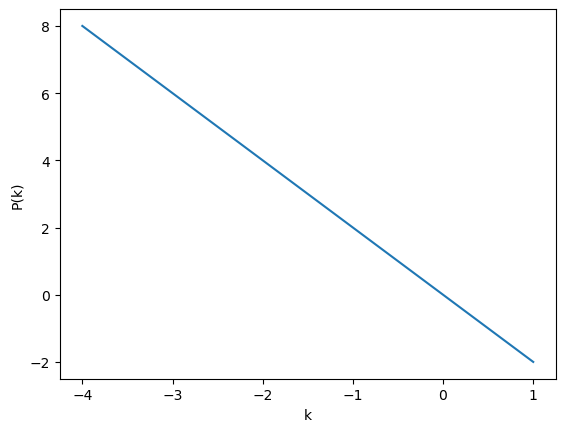

In [76]:
#Now we want to modify the amplitudes these coefficients to mimic a certain 
# Power Spectrum (modulus square of Fourier transform)
# For instance, let's try a powerlaw: P(kk)=kk^a
#so logP(k)= a*log(kk)
a=-2
logk=np.log10(kk)
logP=a*logk
Pk=10**logP 
#Ok, this is our power spectrum. Let's take a look at it!
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
ax.plot(logk, logP, markeredgewidth=2)
plt.xlabel('k')
plt.ylabel('P(k)')

This power spectrum is not white. It clearly favors smaller k (i.e. it has more long wavelengths)! Let's apply it to our white random frequency mix that we produced before!

Text(0, 0.5, 'log f_rescaled_k (k)')

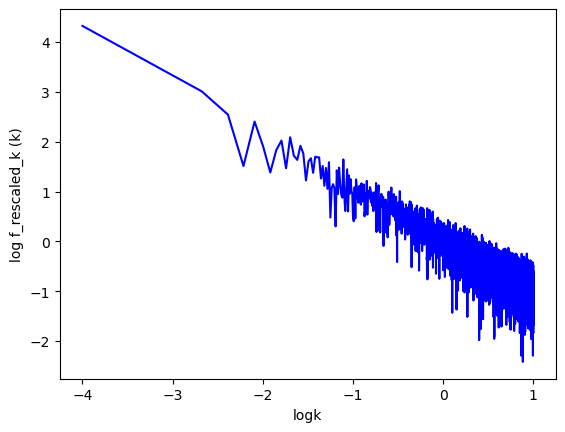

In [82]:
field_k=np.sqrt(Pk)*random
fig, ax=plt.subplots()
ax.plot(logk,np.log10(field_k),markeredgewidth=2,color='blue')
plt.xlabel('logk')
plt.ylabel('log f_rescaled_k (k)')

Text(0, 0.5, 'f(x)')

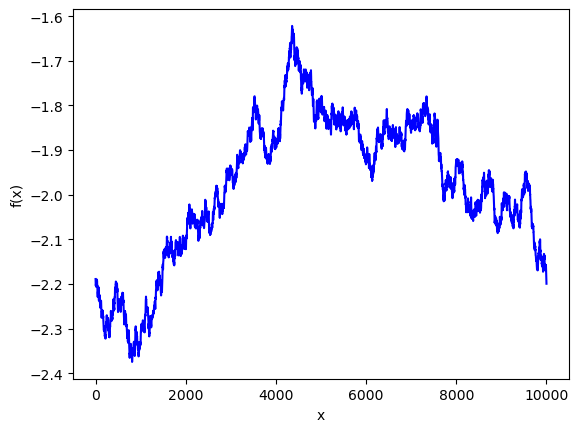

In [86]:
#Let's take the square root of it to scale the random amplitudes we generated before
#to create a random field but with less small wavelengths, and more long wavelengths
field_P=ifft(np.sqrt(Pk)*random)
fig, ax = plt.subplots()
ax.plot(xx, field_P, markeredgewidth=2, color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')

Success! We have a 1D random spatial field with a preset mix of scales!It's clear that the smallest variations have been damped compared to the long range ones!
When we want to generate initial conditions of the initial density field of the Universe for our simulations,
this is how we proceed, but in 3D!
We create a 3D gaussian random field with a preset mix of scales by using the initial P(k) we get from our cosmological model and observations.